In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [149]:
inpTrain = np.zeros((90, 4))
inpTrain[0:30,:] = iris.data[0:30, :]
inpTrain[30:60,:] = iris.data[50:80, :]
inpTrain[60:90,:] = iris.data[100:130, :]
targetTrain = np.zeros((90,))
targetTrain[0:30] = iris.target[0:30]
targetTrain[30:60] = iris.target[50:80]
targetTrain[60:90] = iris.target[100:130]

In [5]:
def convertTarget(dataTarget):
    if dataTarget==0:
        target = np.array([[0,0]])
    elif dataTarget==1:
        target = np.array([[0,1]])
    elif dataTarget==2:
        target = np.array([[1,0]])
    else:
        target = np.array([[1,1]])
    return target

In [7]:
def convertOutput(outputJST):
    if outputJST[0,0] < .5 and outputJST[0,1] < .5:
        outReal=0
    elif outputJST[0,0] < .5 and outputJST[0,1] >= .5:
        outReal=1
    elif outputJST[0,0] >= .5 and outputJST[0,1] < .5:
        outReal=2
    else:
        outReal=3
    return outReal

In [158]:
def initNN(numOfInput, numOfHiddenNeuron, numOfOutpunNeuron):
    # num of input sudah termasuk bias
    # num of hidden neuron belum termasuk bias pada hidden neuron
    # w bobot antara input dengan hidden
    # v bobot antara input dengan output
    w = np.random.rand(numOfInput, numOfHiddenNeuron)
    v = np.random.rand(numOfHiddenNeuron+1, numOfOutpunNeuron) # ?? 1
    return (w, v)

In [9]:
def sigmoidFn(x):
    return 1/(1+np.exp(-x))

In [97]:
def activationComputation(inp, weight):
    # hitung netInput dan nilai aktivasi
    netInput = inp.dot(weight)
    outputActivation = sigmoidFn(netInput)
    return outputActivation

In [11]:
def updateV(target, outputJST, dataHidden, v, alpha):
    (m,n) = outputJST.shape
    (p,q) = v.shape
    tempDeltaV = np.zeros((m,n))
    deltaV = np.zeros((p,q))
    tempDeltaV[0,0] = (target[0,0] - outputJST[0,0]) * outputJST[0,0] * ( 1 - outputJST[0,0] )
    tempDeltaV[0,1] = (target[0,1] - outputJST[0,1]) * outputJST[0,1] * ( 1 - outputJST[0,1] )
    for i in range(p):
        for j in range(q):
            deltaV[i,j] = alpha * tempDeltaV[0,j] * dataHidden[0,i]
            v=v+deltaV
    return (v, tempDeltaV)

In [24]:
def updateW(dataInput, outputHidden, tempDeltaV, v,w,alpha):
    (m,n) = v.shape
    tempV = v[1:m,:]
    tempV = tempV.T
    tempDeltaY = tempDeltaV.dot(tempV)
    (p,q) = w.shape
    deltaW = np.zeros((p,q))
    for i in range(p):
        for j in range(q):
            deltaW[i,j] = alpha * tempDeltaY[0,j] * dataInput[0,i] * ( outputHidden[0,j] * ( 1 - outputHidden[0,j] ) )
            w = w + deltaW
    return w

In [13]:
def errorIterasi(target, outputNN):
    (m,n) = target.shape
    tempOut = np.zeros((m,n))
    if outputNN[0,0] < .5:
        tempOut[0,0] = 0
    if outputNN[0,0] >= .5:
        tempOut[0,0] = 1
    if outputNN[0,1] < .5:
        tempOut[0,1] = 0
    if outputNN[0,1] >= .5:
        tempOut[0,1] = 1
    tempError = np.sqrt(((tempOut[0,0] - target[0,0]) ** 2) + ((tempOut[0,1] - target[0,1]) ** 2 ))
    return tempError

In [225]:
def trainNN(dataIn, dataTarget, numOfHiddenNeuron, numOfOutputNeuron, epoch, learningRate):
    import matplotlib.pyplot as plt
    %matplotlib inline
    (numOfData, numOfInput) = dataIn.shape
    numOfInput = numOfInput + 1
    (w, v) = initNN(numOfInput, numOfHiddenNeuron, numOfOutputNeuron)
    
    # print("jumlah input", numOfInput)
    # print("jumlah hidden", numOfHiddenNeuron)
    # print("jumlah bobot input dengan hidden", w)
    # print("jumlah bobot hidden dengan output", v)
    (numOfData, numOfFeature) = dataIn.shape
    oldV = np.zeros((numOfHiddenNeuron+1, numOfOutputNeuron))
    i = 0
    errorData = 100
    while i < epoch and errorData > .01:
        count = 0
        errorData = 0
        for j in range(numOfData):
            dataInp = dataIn[count, :]
            (m,) = dataInp.shape
            dataInput = np.ones((1, m+1))
            # print(dataInput.shape, dataInp.shape)
            # dataInput[0, 1:] = dataInp[:]
            dataInput[0,1:5] = dataInp[:4]
            # print(dataInput.shape, dataInp.shape)
            outHidden = activationComputation(dataInput, w)
            dataHidden = np.ones((1, numOfHiddenNeuron+1))
            dataHidden[0,1:] = outHidden
            outNN = activationComputation(dataHidden, v)
            t = dataTarget[count]
            target=convertTarget(t)
            errorData = errorData + errorIterasi(target, outNN)
            oldV=v
            (v, deltaV) = updateV(target, outNN, dataHidden, v, learningRate)
            w = updateW(dataInput, outHidden, deltaV, oldV, w, learningRate)
            count +=1
        errorData=errorData/numOfData
        i += 1
        plt.plot(i, errorData, 'or')
    plt.show()
    return (w, v)

In [223]:
def testNN(dataIn, w, v):
    (numOfData, numOfInput) = dataIn.shape
    
    (m, numOfhiddenNeuron) = w.shape
    # print(f"jumlah data {numOfData} jumlah input {numOfInput}")
    # print(f"jumlah data bobot awal {m} jumlah hidden neuron {numOfHiddenNeuron}")
    count = 0
    for j in range(numOfData):
        # print('j = ', j)
        dataInp = dataIn[j,:]
        # print('data input sebelum ada bias = ',dataInp.shape)
        dataInput = np.ones((1, m))
        # print('data input sebelum ada bias = ',dataInput.shape)
        dataInput[0,1:5] = dataInp[0:4]
        # print('data input sebelum ada bias = ',dataInput.shape)
        # print(dataInput.shape)
        # outHidden = hiddenActivation(dataInput, w)
        outHidden = activationComputation(dataInput, w)
        dataHidden = np.ones((1, numOfhiddenNeuron+1))
        # print(dataHiddenshape, outHidden)
        # print(dataHidden.shape, v.shape)
        dataHidden[0, 1:] = outHidden # ? [0,1]
        outNN=activationComputation(dataHidden, v)
        
        res = convertOutput(outNN)
        print(f"data ke-{j} =  {res}")
        if j in range(0, 50):
            if res == 0:
                count+=1
        if j in range(50, 100):
            if res == 1:
                count+=1
        if j in range(100, 150):
            if res == 2:
                count+=1
        print(f"akurasi = {(count / 150) * 100}")
            

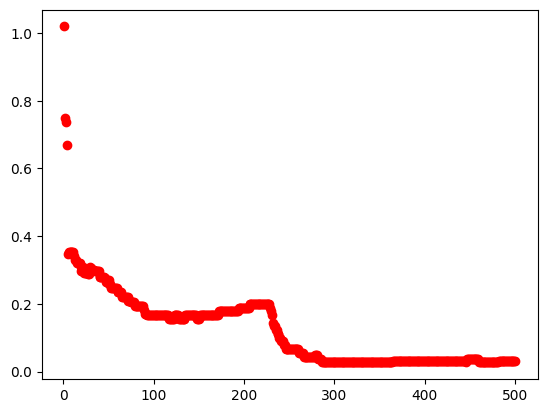

data ke-0 =  0
akurasi = 0.6666666666666667
data ke-1 =  0
akurasi = 1.3333333333333335
data ke-2 =  0
akurasi = 2.0
data ke-3 =  0
akurasi = 2.666666666666667
data ke-4 =  0
akurasi = 3.3333333333333335
data ke-5 =  0
akurasi = 4.0
data ke-6 =  0
akurasi = 4.666666666666667
data ke-7 =  0
akurasi = 5.333333333333334
data ke-8 =  0
akurasi = 6.0
data ke-9 =  0
akurasi = 6.666666666666667
data ke-10 =  0
akurasi = 7.333333333333333
data ke-11 =  0
akurasi = 8.0
data ke-12 =  0
akurasi = 8.666666666666668
data ke-13 =  0
akurasi = 9.333333333333334
data ke-14 =  0
akurasi = 10.0
data ke-15 =  0
akurasi = 10.666666666666668
data ke-16 =  0
akurasi = 11.333333333333332
data ke-17 =  0
akurasi = 12.0
data ke-18 =  0
akurasi = 12.666666666666668
data ke-19 =  0
akurasi = 13.333333333333334
data ke-20 =  0
akurasi = 14.000000000000002
data ke-21 =  0
akurasi = 14.666666666666666
data ke-22 =  0
akurasi = 15.333333333333332
data ke-23 =  0
akurasi = 16.0
data ke-24 =  0
akurasi = 16.6666666666

In [234]:
(w, v) = trainNN(inpTrain, targetTrain, numOfHiddenNeuron=8, numOfOutputNeuron=3, epoch=500, learningRate=.01)
testNN(iris.data, w, v)